In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [4]:
# locate the file
FakeFileName = './Decision Tree-Dataset/fake.txt'
RealFileName = './Decision Tree-Dataset/real.txt'

## 1. Loading the Data

In [17]:
def load_data(real_data, fake_data):

    with open(real_data, "r", encoding ='utf-8') as f:
        real_headlines = f.readlines()
    with open(fake_data, 'r', encoding = 'utf-8') as f:
        fake_headlines = f.readlines()

    real_headlines = [line.strip() for line in real_headlines]
    fake_headlines = [line.strip() for line in fake_headlines]

    data = pd.DataFrame({"headline": real_headlines + fake_headlines, 'label': [1] * len(real_headlines) + [0] * len(fake_headlines)})
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['headline'])
    y = data['label']

    X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, vectorizer

    
    print(X)

## 2. Train Decision Trees with Different Depths

In [22]:
def select_model(X_train, X_val, y_train, y_val):

    depths = [3,5,10,15,30]
    accuracies =[]

    for depth in depths:
        model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val,y_pred)
        accuracies.append(accuracy)
        print(f'max_depth = {depth}, Validation Accuracy = {accuracy:.4f}')

    plt.figure(figsize= (8,5))
    plt.plot(depths, accuracies, marker='o', linestyle= '-')
    plt.xlabel('Max Depth')
    plt.ylabel('Validation Accuracy')
    plt.title("Validation Accuracies vs Max Depth")
    plt.grid()
    plt.show()

    best_depth = depths[np.argmax(accuracies)]
    return best_depth

max_depth = 3, Validation Accuracy = 0.6939
max_depth = 5, Validation Accuracy = 0.6898
max_depth = 10, Validation Accuracy = 0.7000
max_depth = 15, Validation Accuracy = 0.7082
max_depth = 30, Validation Accuracy = 0.7449


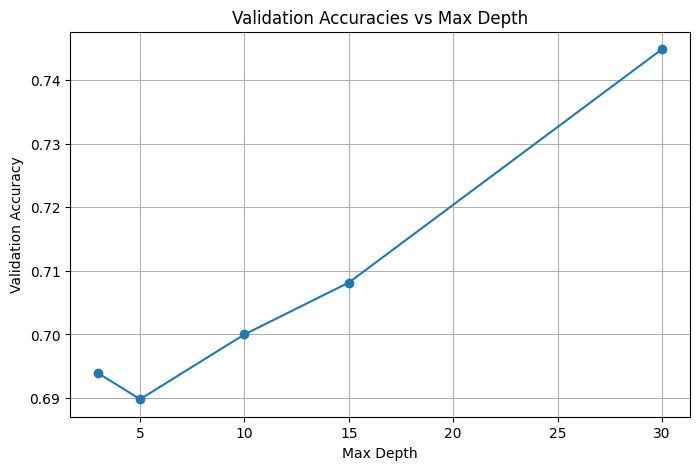

In [23]:
X_train, X_val, X_test, y_train, y_val, y_test, vectorizer= load_data(RealFileName, FakeFileName)
best_depth = select_model(X_train, X_val, y_train, y_val)